In [3]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
import operator
#from wordcloud import WordCloud, STOPWORDS #used to generate world cloud


In [4]:
# lets explore movies.csv
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv('ml-100k/u.item',delimiter='|',names=m_cols,encoding='latin-1')
#data.shape

In [34]:
data.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#data.info()

In [6]:
#number of unique movies
movies = data['movie_id'].unique().tolist()
num_items = len(movies)

In [7]:
#explore users
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv('ml-100k/u.user',delimiter='|',names=u_cols,encoding='latin-1')
#data_u.shape

In [8]:
#data_u.head()

In [9]:
#number of unique users
users = data_u['user_id'].unique().tolist()
num_users = len(users)
#num_users

In [14]:
#explore ratings
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv('ml-100k/u1.base',delimiter='\t',names=r_cols,encoding='latin-1')
#data_r.shape

In [16]:
data_r.head()

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


# Q2, a

In [64]:
ratings = data_r[['movie_id','rating']].groupby(['movie_id']).mean()
ratings = ratings.sort_values(['rating'],ascending=False)
ratings.head(3)

,rating
movie_id,
1189,5.0
1653,5.0
1599,5.0


# Q2, b

In [74]:
count_rating = data_r[['movie_id','rating']].groupby(['movie_id']).count()
count_rating = count_rating.sort_values(['rating'],ascending=False)
count_rating.head(3)

,rating
movie_id,
50,484
181,422
258,402


# Q2, c

In [148]:
count_rating = data_r[['movie_id','rating']].groupby(['movie_id']).count()
count_rating_big_than_4 = data_r[['movie_id','rating']][data_r.rating > 4].groupby(['movie_id']).count()
rows_big = count_rating_big_than_4.iterrows()
movies  = pd.DataFrame(columns = ['movie_id','rating_percent'])
for index, row in count_rating_big_than_4.iterrows():
     movies.loc[index] = [index,  (row.rating / count_rating.get_value(index,'rating')) * 100]

movies = movies.sort_values(['rating_percent'],ascending=False)
print(movies.head(3))

      movie_id  rating_percent
1293    1293.0           100.0
1653    1653.0           100.0
1189    1189.0           100.0


# Q2, d

In [68]:
data[action_movies].head()

NameError: name 'action_movies' is not defined

In [14]:
action_movies = data['Action'] == 1

In [16]:
#merging two dataframes movies and ratings
movie_data_ratings_data=data.merge(data_r,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head(3)

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411


In [17]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,879197329
10,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,189,5,893264174
22,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,340,5,884990988
32,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,43,5,875975579
37,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,38,5,892430636
39,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,96,5,884403574
41,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,157,5,874813703
48,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,18,5,880130802
51,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,45,5,881013176


In [18]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [19]:
genres_count = {}
for genre in genres:
    count = 0
    genre_movies = movie_data_ratings_data[genre] == 1
    genres_count[genre] = movie_data_ratings_data[genre_movies].shape[0]

In [20]:
print(genres_count)

{'unknown': 10, 'Action': 25589, 'Adventure': 13753, 'Animation': 3605, 'Childrens': 7182, 'Comedy': 29832, 'Crime': 8055, 'Documentary': 758, 'Drama': 39895, 'Fantasy': 1352, 'Film-Noir': 1733, 'Horror': 5317, 'Musical': 4954, 'Mystery': 5245, 'Romance': 19461, 'Sci-Fi': 12730, 'Thriller': 21872, 'War': 9398, 'Western': 1854}


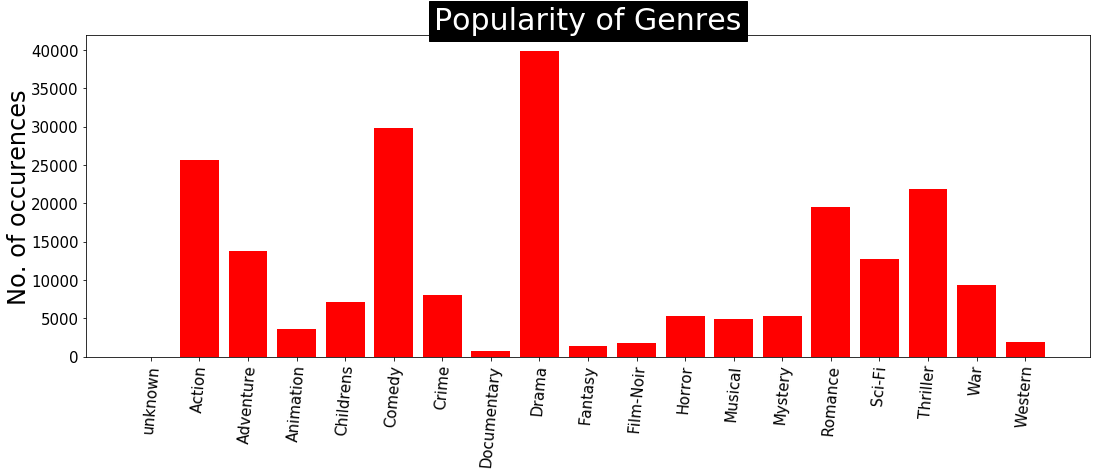

In [21]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genres_count[i] for i in genres_count]
x_axis = [i for i in range(len(genres_count))]
x_label = [i for i in genres_count]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [22]:
#sorting the genres 
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
print(genres_count_list)

[('Drama', 39895), ('Comedy', 29832), ('Action', 25589), ('Thriller', 21872), ('Romance', 19461), ('Adventure', 13753), ('Sci-Fi', 12730), ('War', 9398), ('Crime', 8055), ('Childrens', 7182), ('Horror', 5317), ('Mystery', 5245), ('Musical', 4954), ('Animation', 3605), ('Western', 1854), ('Film-Noir', 1733), ('Fantasy', 1352), ('Documentary', 758), ('unknown', 10)]


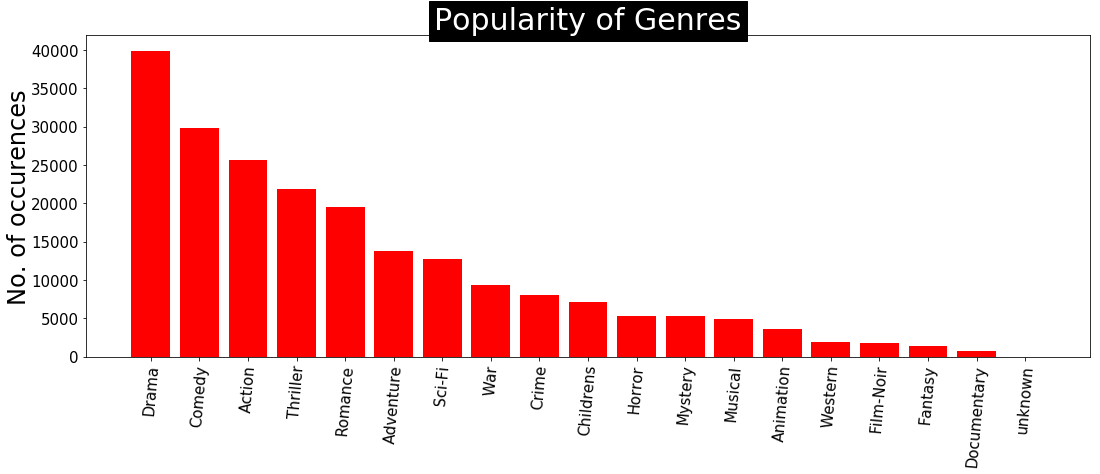

In [23]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()